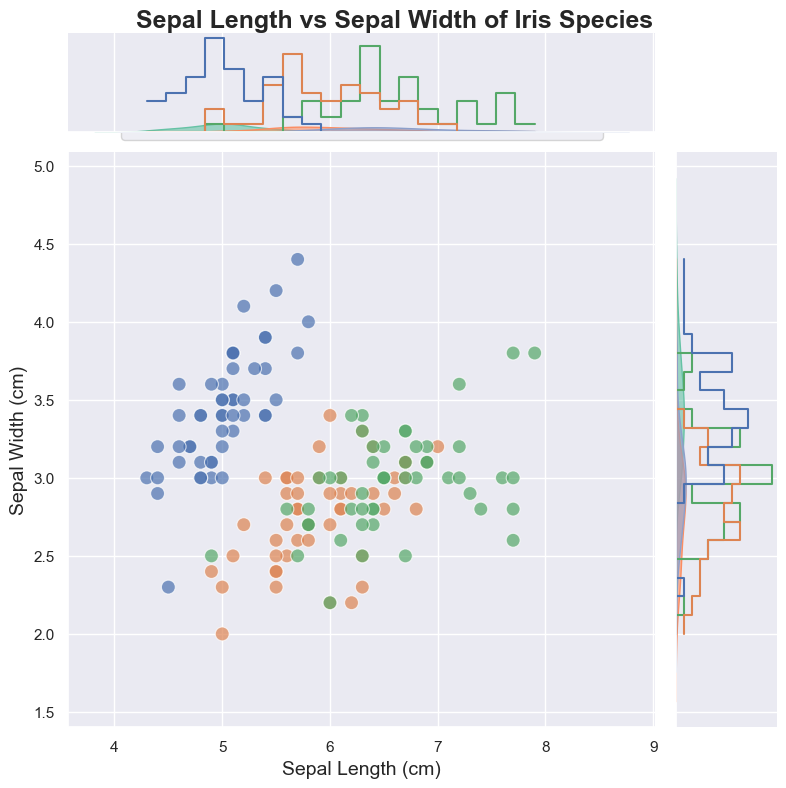

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.datasets import load_iris

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')

# Load the iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Plot
sns.set(style="darkgrid")

# Create the JointGrid plot with larger figure size
g = sns.JointGrid(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species', height=8, ratio=5)

# Scatter plot on the joint axis with enhanced markers
g.plot_joint(sns.scatterplot, s=100, alpha=0.7)

# Plot histograms on the margins
g.plot_marginals(sns.histplot, kde=False, bins=20, element='step', fill=False)

# Plot KDE plots on the margins with added transparency
for species, color in zip(df['species'].cat.categories, sns.color_palette("Set2")):
    subset = df[df['species'] == species]
    sns.kdeplot(x=subset['sepal length (cm)'], ax=g.ax_marg_x, color=color, fill=True, alpha=0.6)
    sns.kdeplot(y=subset['sepal width (cm)'], ax=g.ax_marg_y, color=color, fill=True, alpha=0.6)

# Manually add legend with larger font size
handles, labels = g.ax_joint.get_legend_handles_labels()
g.ax_joint.legend(handles=handles, labels=labels, title='Species', loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fontsize='large', title_fontsize='large')

# Set axis labels with larger font size
g.set_axis_labels("Sepal Length (cm)", "Sepal Width (cm)", fontsize=14)

# Adjust the plot
g.fig.subplots_adjust(top=0.95)

# Add a main title with a larger font size
plt.suptitle("Sepal Length vs Sepal Width of Iris Species", fontsize=18, weight='bold')

plt.show()